In [1]:
import GPy
import matplotlib.pyplot as plt

As of Mon 12th of Oct running on devel branch of GPy 0.8.8

In [2]:
#GPy.plotting.change_plotting_library('plotly')

# Gaussian process regression tutorial

### Nicolas Durrande 2013
#### with edits by James Hensman and Neil D. Lawrence

We will see in this tutorial the basics for building a 1 dimensional and a 2 dimensional Gaussian process regression model, also known as a kriging model.

We first import the libraries we will need:

In [3]:
import numpy as np

## 1-dimensional model

For this toy example, we assume we have the following inputs and outputs:

In [4]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Note that the observations Y include some noise.

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf or square exponential):

In [5]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

The parameter input_dim stands for the dimension of the input space. The parameters `variance` and `lengthscale` are optional, and default to 1. Many other kernels are implemented, type `GPy.kern.<tab>` to see a list

In [6]:
#type GPy.kern.<tab> here:
GPy.kern.BasisFuncKernel

GPy.kern.src.basis_funcs.BasisFuncKernel

The inputs required for building the model are the observations and the kernel:

In [7]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model. The functions `display` and `plot` give an insight of the model we have just built:

In [8]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


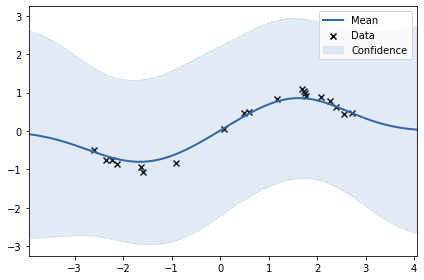

In [9]:
fig = m.plot()
plt.show()

The above cell shows our GP regression model before optimization of the parameters. The shaded region corresponds to ~95% confidence intervals (ie +/- 2 standard deviation).

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood of the data. It as easy as calling `m.optimize` in GPy:

In [10]:
m.optimize(messages=True)

If we want to perform some restarts to try to improve the result of the optimization, we can use the `optimize_restarts` function. This selects random (drawn from $N(0,1)$) initializations for the parameter values, optimizes each, and sets the model to the best solution found.

In [11]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -13.561349090190463
Optimization restart 2/10, f = -13.5613490901849
Optimization restart 3/10, f = -13.561349090203409
Optimization restart 4/10, f = -13.56134909019491
Optimization restart 5/10, f = -13.561349090196046
Optimization restart 6/10, f = -13.561349090054334
Optimization restart 7/10, f = -13.561349090200382
Optimization restart 8/10, f = -13.561349090197142
Optimization restart 9/10, f = -13.561349089740718
Optimization restart 10/10, f = -13.561349089820855


In this simple example, the objective function (usually!) has only one local minima, and each of the found solutions are the same. 

Once again, we can use `print(m)` and `m.plot()` to look at the resulting model resulting model. This time, the paraemters values have been optimized agains the log likelihood (aka the log marginal likelihood): the fit shoul dbe much better. 

GP_regression.,value,constraints,priors
rbf.variance,0.7156812796133564,+ve,
rbf.lengthscale,1.6279503943743436,+ve,
Gaussian_noise.variance,0.003414915619860997,+ve,


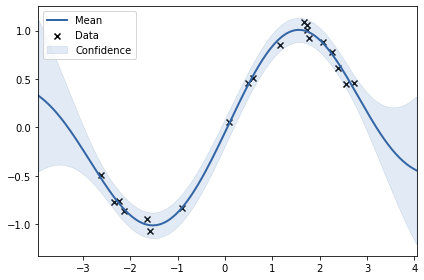

In [12]:
display(m)
fig = m.plot()
plt.show()

### New plotting of GPy 0.9 and later
The new plotting allows you to plot the density of a GP object more fine grained by plotting more percentiles of the distribution color coded by their opacity

GP_regression.,value,constraints,priors
rbf.variance,0.7156812796133564,+ve,
rbf.lengthscale,1.6279503943743436,+ve,
Gaussian_noise.variance,0.003414915619860997,+ve,


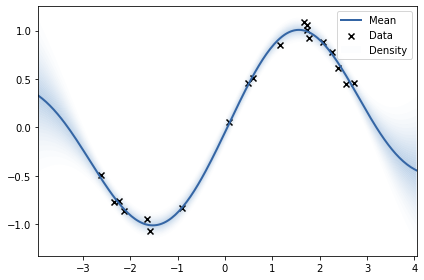

In [13]:
display(m)
fig = m.plot(plot_density=True)
plt.show()

## 2-dimensional example

Here is a 2 dimensional example:

 /Users/font/opt/anaconda3/envs/lya_cosmo/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


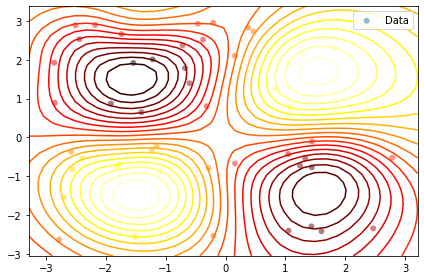

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.34751547294469615,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.000821225789827502,+ve,
Gaussian_noise.variance,0.000821225789827502,+ve,


In [14]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
plt.show()
display(m)

The flag `ARD=True` in the definition of the `Matern` kernel specifies that we want one lengthscale parameter per dimension (ie the GP is not isotropic). Note that for 2-d plotting, only the mean is shown. 